# Financial Inclusion in Africa 

## 1) Expression du but du projet

- **1) a- But principale :** 
    Ce projet à pour but prédire la probabilité si une personne a une compte bancaire ou non(classification binaire) pour quatre pays de l'Afrique de l'Est (Kenya, Rwanda, Tanzanie, Ouganda).

- **1) b- Resolution du problème :**
    La résolution du probléme nécéssite l'utilisation de l'apprentissage machine car les donnée fournie ont une dimension trés large, l'analyse stastique simple ne pourra pas prédire notre but

- **1) c- Definition des problèmes technique et choix de la mésure de pérformance :**
    C'est une problème de classification binaire, donc on aura besoin d'une modèle de classification(régression logistique, SVM, KNN, etc...). Pour faire simple et rapide dans l'apprentisage, nous utiliserons le modèle de classification logistique(régression logistique), ainsi nous mésurerons nos pérformance avec la mésure de "vraissemblance"

    -   *Modèle :* Régression logistique
    -   *Mésure de pérformance :* Vraissemblance 


## 2) Analyse des donnée

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Train.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


#### 2 ) a - Analyse de forme :

In [6]:
df = data.copy()

- *Target variable :* 
    - bank_account

In [7]:
target = df['bank_account']

- *Dimension du datasets :* 
    - 23524 lignes, 13 colonnes

In [8]:
df.shape

(23524, 13)

- *Types de variables :*
    -   Numérique : 10
    -   Catégoriel : 3   

In [12]:
(df.dtypes).value_counts()

object    10
int64      3
Name: count, dtype: int64

- *Analyse des valeurs manquantes :*
    - Notre datasets ne présente pas de valeurs manquantes (0 % de valeurs manquantes)

In [17]:
(df.isna().sum()).sum() / df.size

0.0

### 2 ) b - Analyse de fond :

- *Visualisation du target :*
    - Notre target est une variables catégoriel
    - C'est une variables binaire (YES ou No)
    - 85% de valeur 'No' et 14% de valeur 'Yes'

In [19]:
target = df['bank_account']
target

0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23519     No
23520     No
23521     No
23522     No
23523     No
Name: bank_account, Length: 23524, dtype: object

In [22]:
target.value_counts() / target.shape[0]

bank_account
No     0.859208
Yes    0.140792
Name: count, dtype: float64

- *Compréhension de nos features :*

In [23]:
features = df.drop('bank_account', axis=1)

In [27]:
#division des features en deux class (numérique et catégoriel) 
features_num = features.select_dtypes('int64')
features_cat = features.select_dtypes('object')

In [28]:
features_num.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


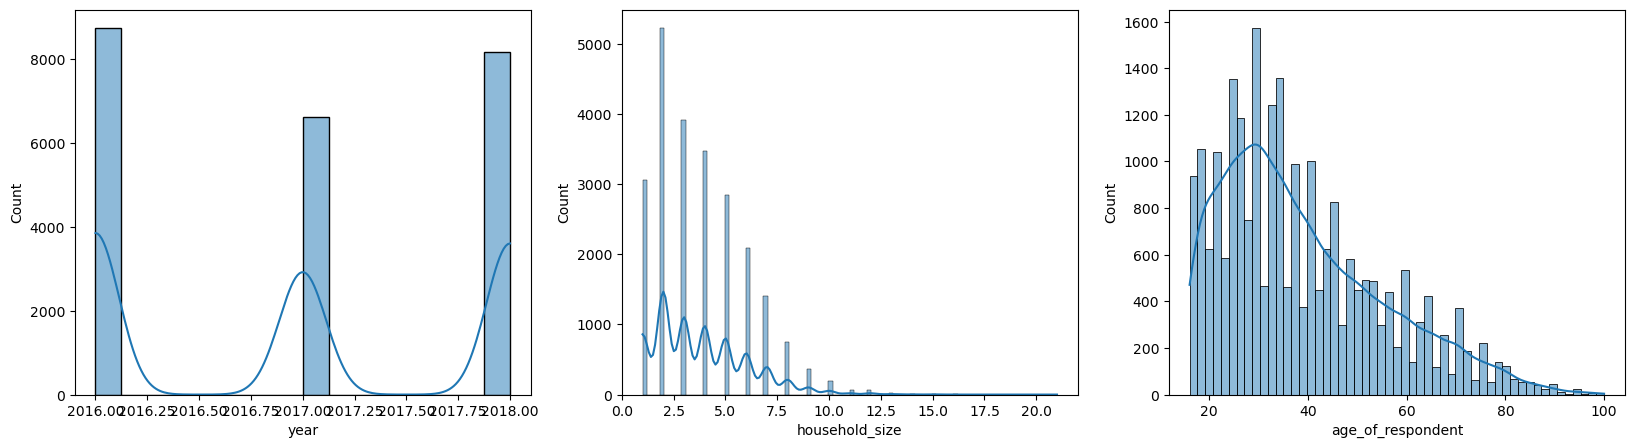

In [35]:
i = 1
plt.figure(figsize=(20,  5))
for col in features_num:
    plt.subplot(1, 3, i)
    sns.histplot(features_num[col], kde=True)
    i += 1 

- Nos variables numérique présente des variables à valeur discète(year et household_size)
- La variables "age_of_respondent" suit une loi de distribution asymétique

In [44]:
for col in features_cat:
    print(f"{col} : {features_cat[col].unique()}")

country : ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
uniqueid : ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
location_type : ['Rural' 'Urban']
cellphone_access : ['Yes' 'No']
gender_of_respondent : ['Female' 'Male']
relationship_with_head : ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_status : ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
education_level : ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']
job_type : ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


- Certains variables sont des variables binaires et d'autre sont multiclass

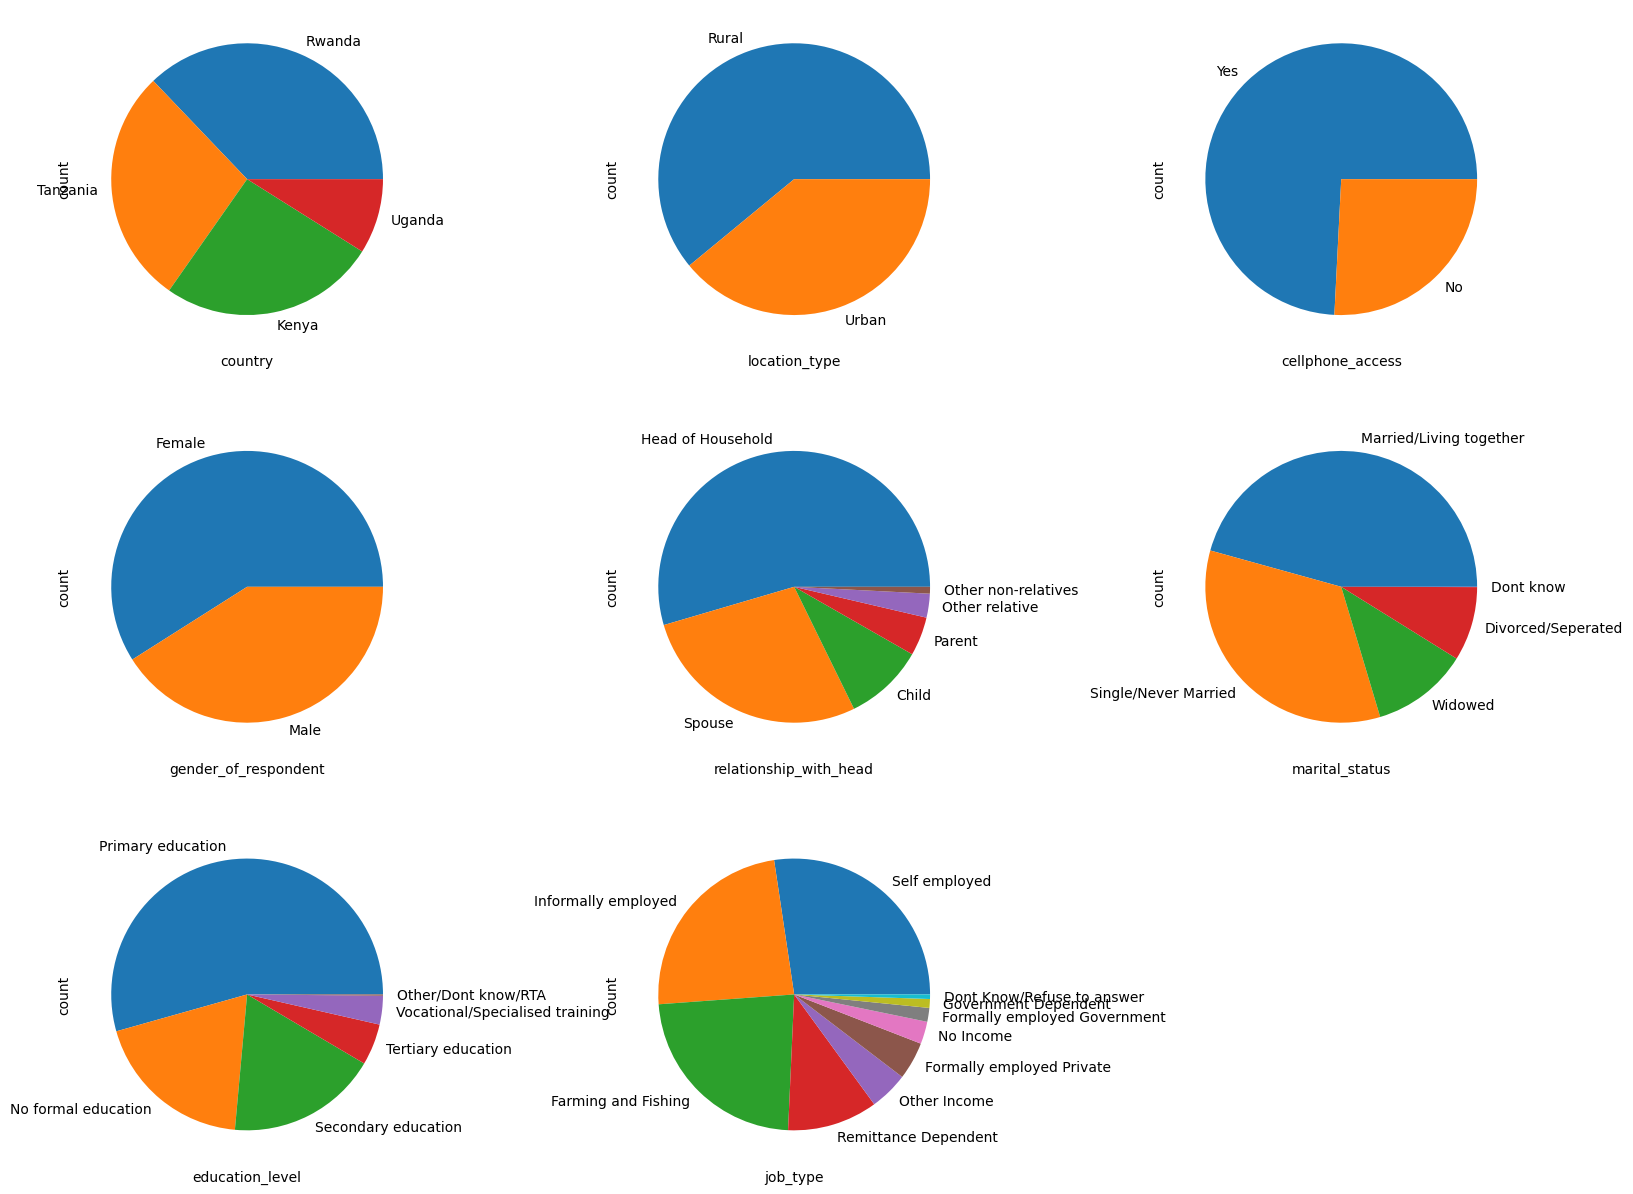

In [48]:
i = 1
plt.figure(figsize=(20, 15))
for col in features_cat:
    if col != 'uniqueid':
        plt.subplot(3, 3, i)
        features_cat[col].value_counts().plot.pie()
        plt.xlabel(col)
        i += 1

- On voit que pour les données binaires, il y a une valeur dominante que l'autre mais pas significative
- Pour les variables multiclass, difficile de faire une interprétation

- *Relation target/Variables :*

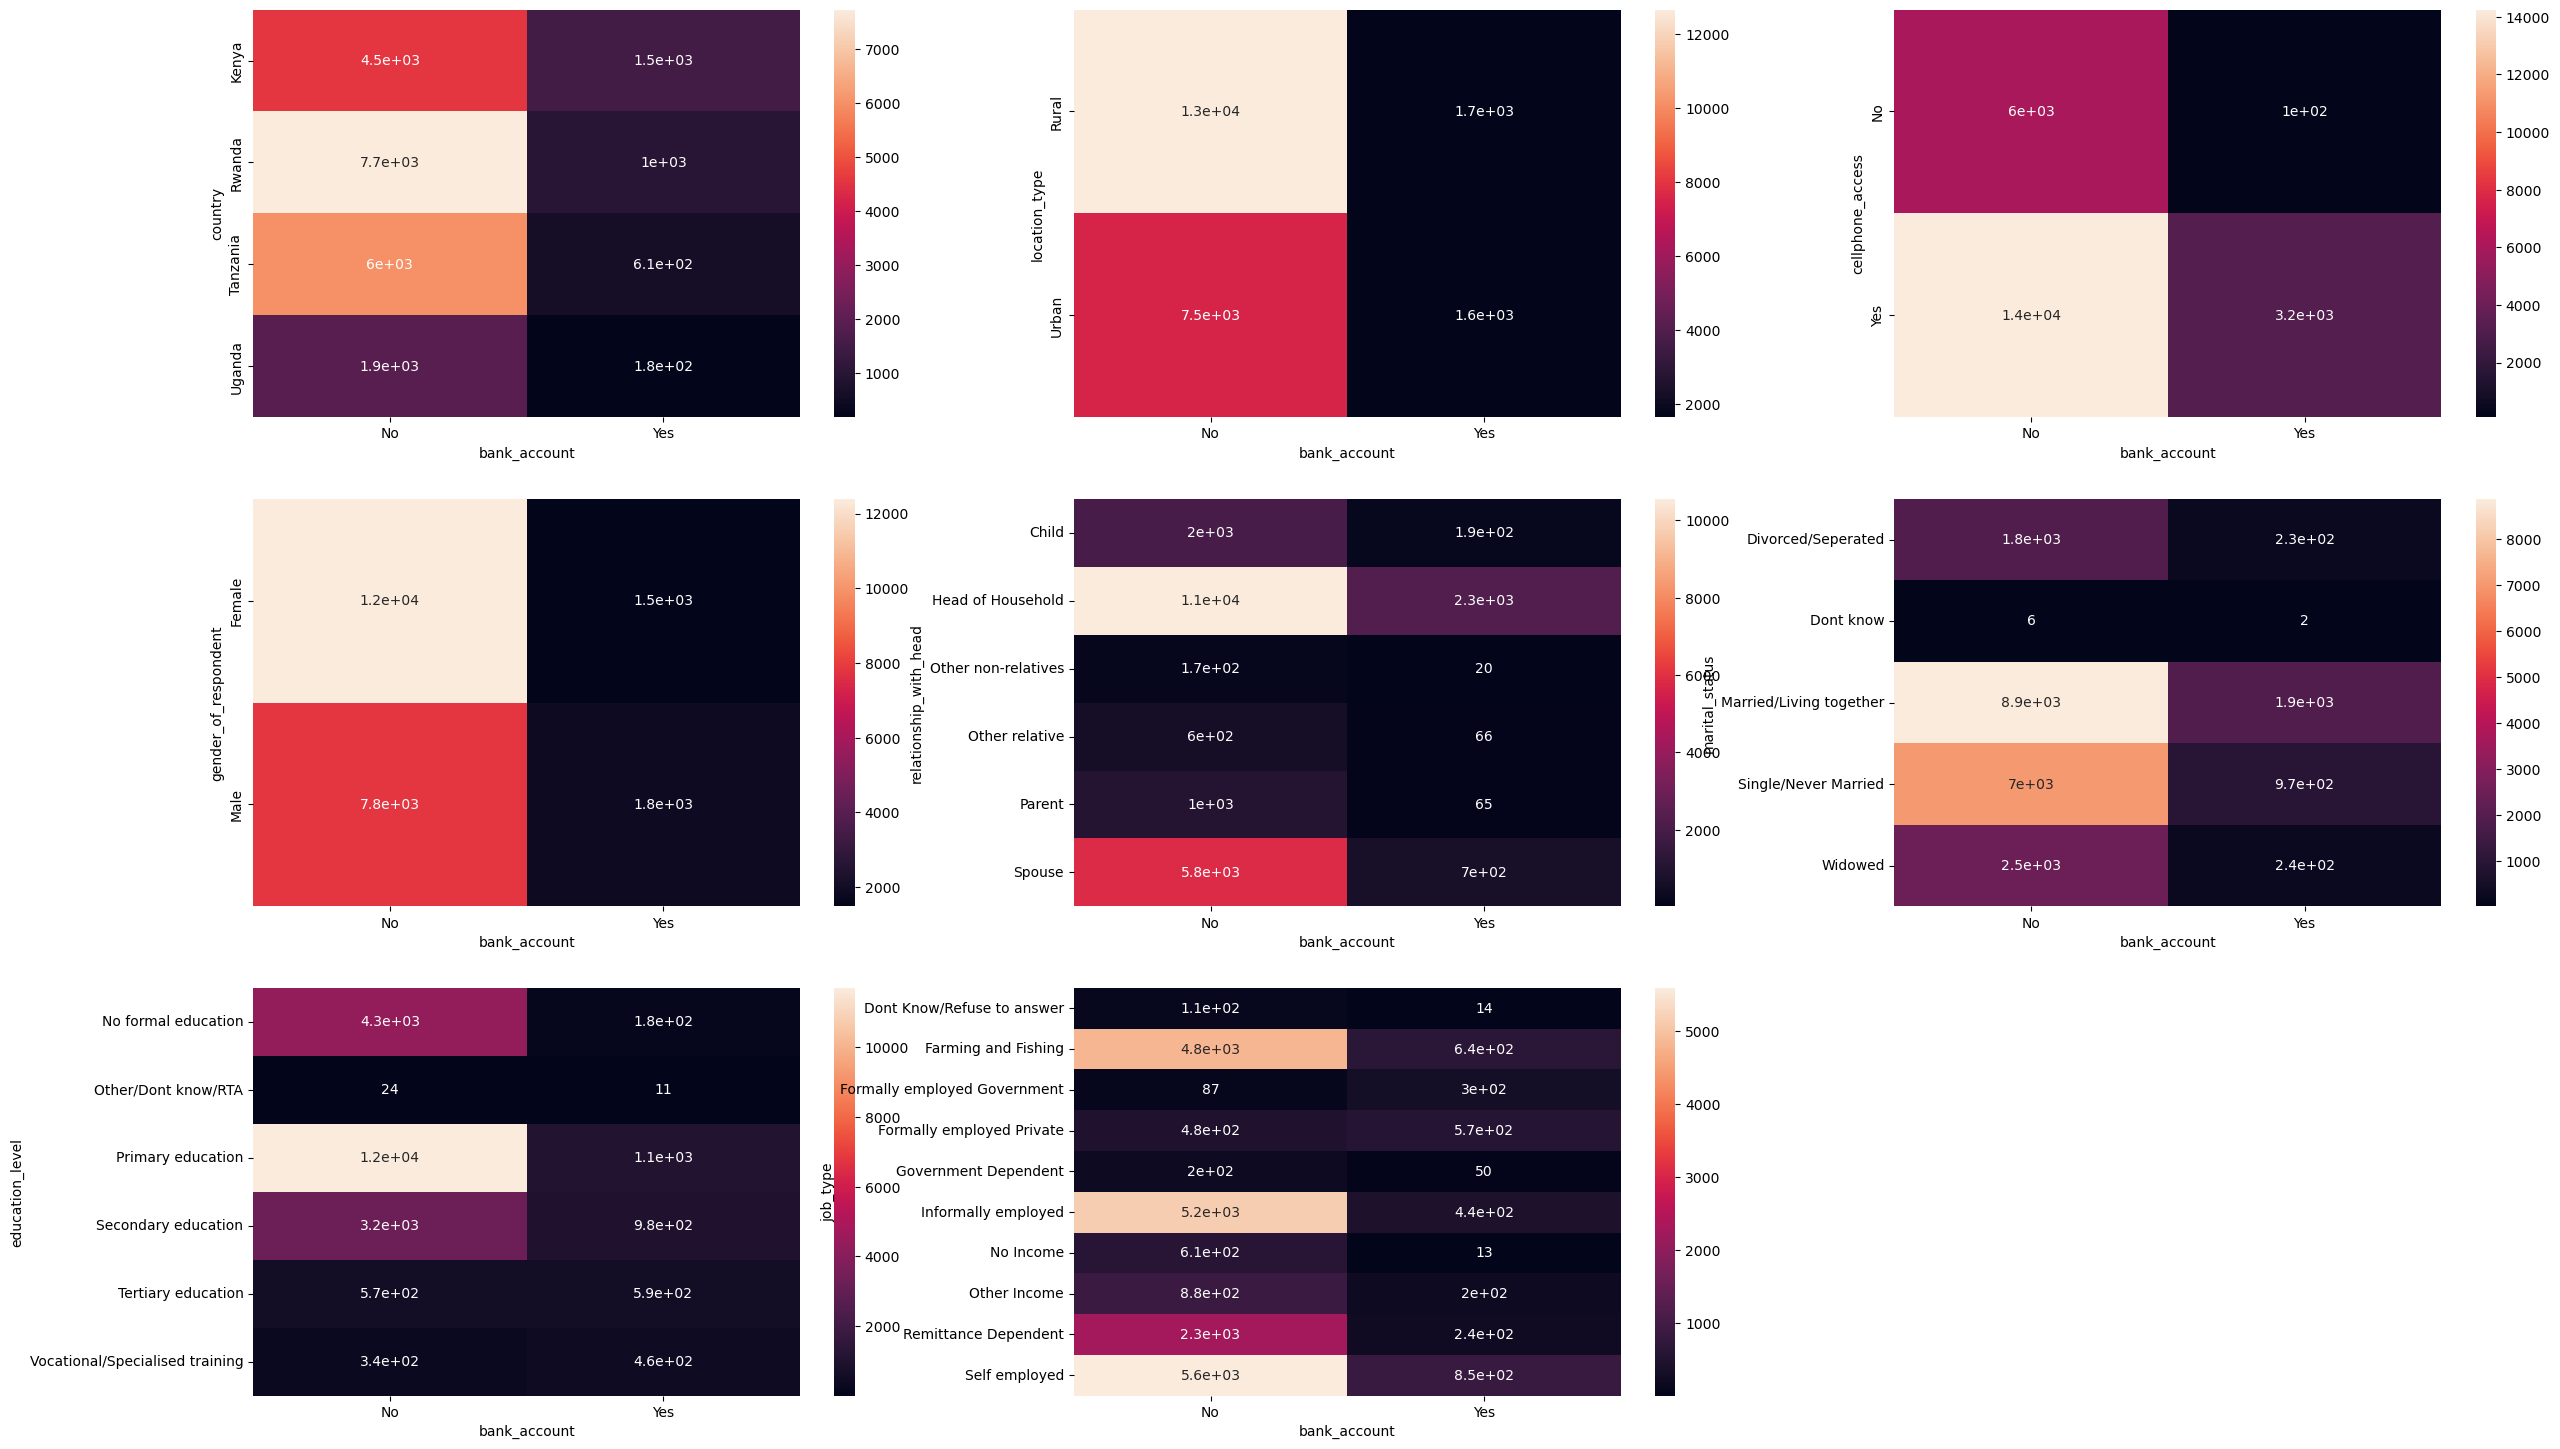

In [52]:
i = 1
plt.figure(figsize=(30, 18))
for col in features_cat:
    if col != 'uniqueid':    
        plt.subplot(3, 3, i)
        sns.heatmap(pd.crosstab(features_cat[col], target), annot=True)
        i += 1

- Pour chaque variables catégoriel, y a une valeur qui semble plus correler avec notre target que d'autre

## 3 ) Data preparation :

In [53]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
data['bank_account'] = le.fit_transform(data['bank_account'])

#Separate training features from target
X_train = data.drop(['bank_account'], axis=1)
y_train = data['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [54]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

In [55]:
processed_train = preprocessing_data(X_train)

In [56]:
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


In [57]:
print(processed_train.shape)

(23524, 37)
